# USA Unemployement history using S&P 500

### The data is acquired from FRED using it's API. Data of unemployement per states is captured.

In [1]:
! pip install fredapi --quiet

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("FRED API")

## 1. Create the FRED object

In [4]:
fred = Fred(api_key= fred_key)
fred

## 2. Search for economic data

In [5]:
SP500 = fred.search('S&P', order_by = "popularity")
SP500.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-04,2023-03-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:09-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-04,2023-03-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,92,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-04,2023-03-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:13-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-04,2023-03-04,S&P 500,2013-03-04,2023-03-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-03 19:10:52-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-04,2023-03-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,82,"For more information regarding the index, plea..."


## 3. Pull and plot the series data

In [6]:
sp500 = fred.get_series(series_id = 'SP500')

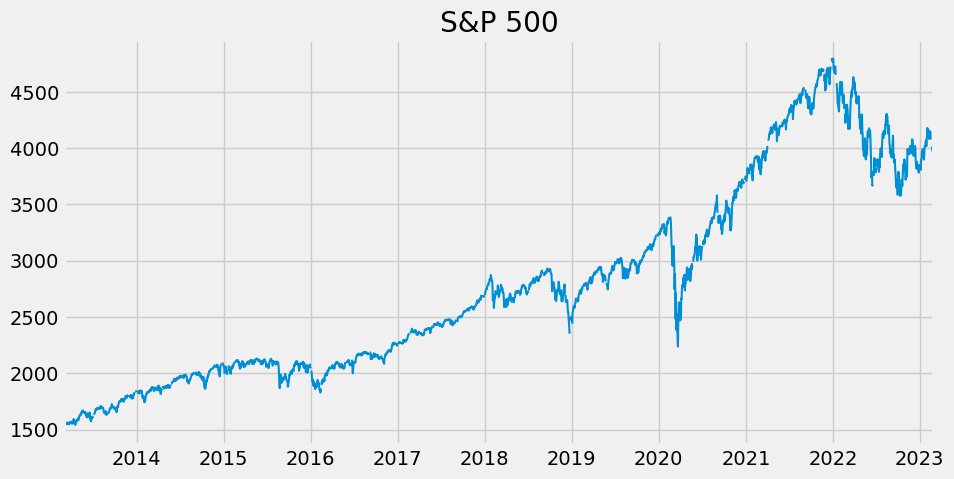

In [7]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 1.5)
plt.show()

## 4. Pull and join multiple data

In [8]:
unemp_results = fred.search('unemployement')
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-04,2023-03-04,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-04,2023-03-04,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-03-04,2023-03-04,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-04,2023-03-04,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-04,2023-03-04,Continued Claims (Insured Unemployment),1967-01-07,2023-02-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-02 07:41:03-06:00,72,"Continued claims, also referred to as insured ..."


In [9]:
unrate = fred.get_series(series_id = 'UNRATE')

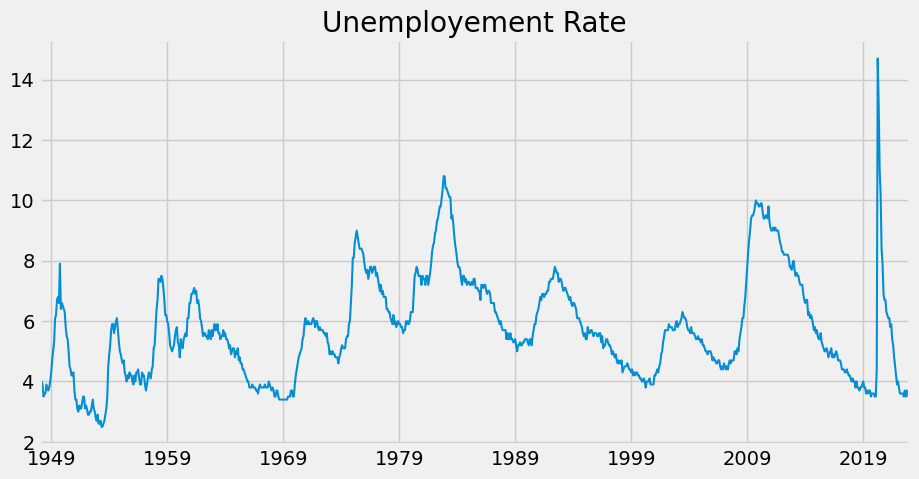

In [10]:
unrate.plot(figsize = (10,5), title = 'Unemployement Rate', lw  = 1.5)
plt.show()

In [11]:
unemp_df = fred.search('unemployement rate state', filter=('frequency', 'Monthly'))
unemp_df.query("seasonal_adjustment	 == 'Seasonally Adjusted' and units == 'Percent'", inplace = True)
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]

In [12]:
unemp_df.columns
len(unemp_df.index)
unemp_df.index

Index(['CAUR', 'TXUR', 'FLUR', 'PAUR', 'NYUR', 'OHUR', 'ALUR', 'NCUR', 'MIUR',
       'ILUR', 'VAUR', 'GAUR', 'MNUR', 'COUR', 'TNUR', 'MAUR', 'WIUR', 'SCUR',
       'KYUR', 'NJUR', 'WAUR', 'MOUR', 'WVUR', 'ORUR', 'INUR', 'NMUR', 'IAUR',
       'AZUR', 'UTUR', 'AKUR', 'ARUR', 'LAUR', 'MDUR', 'NVUR', 'HIUR', 'MTUR',
       'OKUR', 'NDUR', 'SDUR', 'CTUR', 'MSUR', 'IDUR', 'RIUR', 'WYUR', 'MEUR',
       'KSUR', 'NEUR', 'NHUR', 'DCUR', 'PRUR', 'VTUR', 'DEUR', 'CMWRUR',
       'CNERUR', 'CSOUUR', 'CNEWUR'],
      dtype='object', name='series id')

In [13]:
all_results = []

for ids in unemp_df.index:
    results = fred.get_series(series_id=ids)
    results = results.to_frame(name = ids)
    all_results.append(results)

In [14]:
unemp_results= pd.concat(all_results, axis=1)
unemp_results.drop(['CMWRUR','CNERUR', 'CSOUUR', 'CNEWUR'], axis=1, inplace = True)
unemp_states = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states

{'CAUR': ' California',
 'TXUR': ' Texas',
 'FLUR': ' Florida',
 'PAUR': ' Pennsylvania',
 'NYUR': ' New York',
 'OHUR': ' Ohio',
 'ALUR': ' Alabama',
 'NCUR': ' North Carolina',
 'MIUR': ' Michigan',
 'ILUR': ' Illinois',
 'VAUR': ' Virginia',
 'GAUR': ' Georgia',
 'MNUR': ' Minnesota',
 'COUR': ' Colorado',
 'TNUR': ' Tennessee',
 'MAUR': ' Massachusetts',
 'WIUR': ' Wisconsin',
 'SCUR': ' South Carolina',
 'KYUR': ' Kentucky',
 'NJUR': ' New Jersey',
 'WAUR': ' Washington',
 'MOUR': ' Missouri',
 'WVUR': ' West Virginia',
 'ORUR': ' Oregon',
 'INUR': ' Indiana',
 'NMUR': ' New Mexico',
 'IAUR': ' Iowa',
 'AZUR': ' Arizona',
 'UTUR': ' Utah',
 'AKUR': ' Alaska',
 'ARUR': ' Arkansas',
 'LAUR': ' Louisiana',
 'MDUR': ' Maryland',
 'NVUR': ' Nevada',
 'HIUR': ' Hawaii',
 'MTUR': ' Montana',
 'OKUR': ' Oklahoma',
 'NDUR': ' North Dakota',
 'SDUR': ' South Dakota',
 'CTUR': ' Connecticut',
 'MSUR': ' Mississippi',
 'IDUR': ' Idaho',
 'RIUR': ' Rhode Island',
 'WYUR': ' Wyoming',
 'MEUR': 

In [15]:
unemp_results.rename(columns= unemp_states, inplace=True)
unemp_results.drop([' the District of Columbia'], axis=1, inplace = True)

In [16]:
unemp_results.columns

Index([' California', ' Texas', ' Florida', ' Pennsylvania', ' New York',
       ' Ohio', ' Alabama', ' North Carolina', ' Michigan', ' Illinois',
       ' Virginia', ' Georgia', ' Minnesota', ' Colorado', ' Tennessee',
       ' Massachusetts', ' Wisconsin', ' South Carolina', ' Kentucky',
       ' New Jersey', ' Washington', ' Missouri', ' West Virginia', ' Oregon',
       ' Indiana', ' New Mexico', ' Iowa', ' Arizona', ' Utah', ' Alaska',
       ' Arkansas', ' Louisiana', ' Maryland', ' Nevada', ' Hawaii',
       ' Montana', ' Oklahoma', ' North Dakota', ' South Dakota',
       ' Connecticut', ' Mississippi', ' Idaho', ' Rhode Island', ' Wyoming',
       ' Maine', ' Kansas', ' Nebraska', ' New Hampshire', ' Puerto Rico',
       ' Vermont', ' Delaware'],
      dtype='object')

In [17]:
px.line(unemp_results)